<a href="https://colab.research.google.com/github/amandadewifebia/CNN_Covid19/blob/main/CodingCNNCovid19Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Menghubungkan Google Drive

In [ ]:
# CONNECT GOOGLE DRIVE 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mengambil Data COVID-19

In [ ]:
# IMPORT LIBRARY PACKAGE PENDUKUNG 
import pandas as pd
import os
import os.path
import shutil

In [ ]:
# MEMANGGIL SAMPEL DATA POSITIF COVID-19 (GITHUB) 
File_Path = '/content/drive/MyDrive/covid-chestxray-dataset/metadata.csv'
Images_Path = '/content/drive/MyDrive/covid-chestxray-dataset/images'

In [ ]:
# MENGHITUNG BANYAKNYA BARIS DAN KOLOM PADA DATASET 
df = pd.read_csv(File_Path)
print(df.shape)

(950, 30)


In [ ]:
# MENAMPILKAN 5 DATA TERATAS DARI DATASET  
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [ ]:
# MEMBUAT FOLDER PENYIMPANAN BARU DI GOOGLE DRIVE 
Data_Dir = '/content/drive/MyDrive/Dataset/Covid-19'

if not os.path.exists(Data_Dir):
  os.mkdir(Data_Dir)
  print("Covid-19 folder created")

Covid-19 folder created


In [ ]:
# MENGMBIL DATA POSITIF COVID-19 DENGAN POSISI ORGAN THORAX POSTERIOR-ANTERIOR (PA) 
cnt = 0

for (i,row) in df.iterrows():
  if row["finding"]=="Pneumonia/Viral/COVID-19"and row["view"]=="PA":
    filename = row["filename"]
    image_path = os.path.join(Images_Path,filename)
    image_copy_path = os.path.join(Data_Dir,filename)
    shutil.copy2(image_path,image_copy_path)
    print("Moving image",cnt)
    cnt += 1

Moving image 0
Moving image 1
Moving image 2
Moving image 3
Moving image 4
Moving image 5
Moving image 6
Moving image 7
Moving image 8
Moving image 9
Moving image 10
Moving image 11
Moving image 12
Moving image 13
Moving image 14
Moving image 15
Moving image 16
Moving image 17
Moving image 18
Moving image 19
Moving image 20
Moving image 21
Moving image 22
Moving image 23
Moving image 24
Moving image 25
Moving image 26
Moving image 27
Moving image 28
Moving image 29
Moving image 30
Moving image 31
Moving image 32
Moving image 33
Moving image 34
Moving image 35
Moving image 36
Moving image 37
Moving image 38
Moving image 39
Moving image 40
Moving image 41
Moving image 42
Moving image 43
Moving image 44
Moving image 45
Moving image 46
Moving image 47
Moving image 48
Moving image 49
Moving image 50
Moving image 51
Moving image 52
Moving image 53
Moving image 54
Moving image 55
Moving image 56
Moving image 57
Moving image 58
Moving image 59
Moving image 60
Moving image 61
Moving image 62
Mo

# Implementasi Convolutional Neural Network (CNN)

In [ ]:
# IMPORT LIBRARY PACKAGE PENDUKUNG  
import os, re, glob, cv2, numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn

In [ ]:
# PREPROCESSING (PELABELAN & RESIZE DATA) 
dirs = os.listdir('/content/drive/My Drive/DATASET/ChestX-Ray/')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/My Drive/DATASET/ChestX-Ray/'+i+'/*'):
        #im = cv2.imread(pic)
        #im = cv2.resize(im,(64,64))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah COVID-19 : 196
Jumlah Normal : 196


In [ ]:
# MENCETAK SALAH SATU SAMPEL DATA 
X[0] # Mencetak X yang ke-0 

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
# MENCETAK SALAH SATU SAMPEL DATA 
X[1] # Mencetak X yang ke-1 

array([[[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [16, 16, 16]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [17, 17, 17],
        [16, 16, 16],
        [16, 16, 16]],

       ...,

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [17, 17, 17],
        [16, 16, 16],
        [18, 18, 18]],

       [[18, 18, 18],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [17, 17, 17],
        [18, 18, 18],
        [18, 18, 18]],

       [[18, 18, 18],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [17, 17, 17],
        [19, 19, 19],
        [17, 17, 17]]], dtype=uint8)

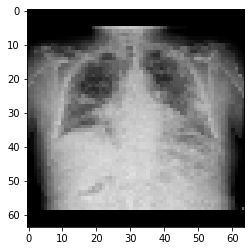

In [ ]:
# MENAMPILKAN HASIL RESIZE CITRA 
plt.imshow(X[1]) # Mencetak Citra Berlabel-0 (COVID-19)

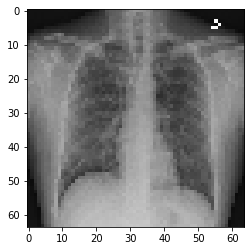

In [ ]:
# MENAMPILKAN HASIL RESIZE CITRA 
plt.imshow(X[1]) # Mencetak Citra Berlabel-1 (Normal)

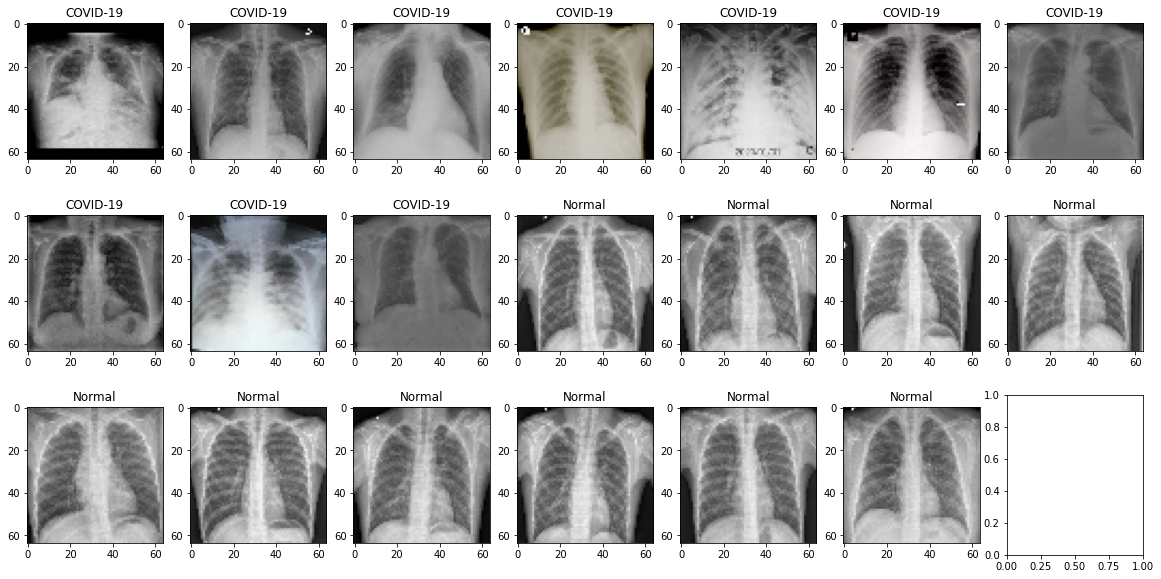

In [ ]:
# MENAMPILKAN RESIZE CITRA COVID-19 DAN CITRA NORMAL 

fig, axs = plt.subplots(3, 7, figsize=(20, 10))
cnt = 0
row = 0
col = 0
for i in im_arr:
  for key, value in i.items():
    if(cnt==7):
      row = row + 1
      col = 0
      cnt = 0
    axs[row, col].imshow(value)
    axs[row, col].set_title(key)
    cnt = cnt + 1
    col = col + 1
plt.show()

In [ ]:
# PREPROCESSING (PEMISAHAN DATA)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state=50)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /= 255
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [ ]:
X_train[0]

array([[[0.11372549, 0.11372549, 0.11372549],
        [0.16470589, 0.16470589, 0.16470589],
        [0.1882353 , 0.1882353 , 0.1882353 ],
        ...,
        [0.10588235, 0.10588235, 0.10588235],
        [0.10196079, 0.10196079, 0.10196079],
        [0.10196079, 0.10196079, 0.10196079]],

       [[0.3019608 , 0.3019608 , 0.3019608 ],
        [0.26666668, 0.26666668, 0.26666668],
        [0.2901961 , 0.2901961 , 0.2901961 ],
        ...,
        [0.16078432, 0.16078432, 0.16078432],
        [0.09411765, 0.09411765, 0.09411765],
        [0.09411765, 0.09411765, 0.09411765]],

       [[0.38431373, 0.38431373, 0.38431373],
        [0.32941177, 0.32941177, 0.32941177],
        [0.36862746, 0.36862746, 0.36862746],
        ...,
        [0.29411766, 0.29411766, 0.29411766],
        [0.27058825, 0.27058825, 0.27058825],
        [0.2509804 , 0.2509804 , 0.2509804 ]],

       ...,

       [[0.1882353 , 0.1882353 , 0.1882353 ],
        [0.29411766, 0.29411766, 0.29411766],
        [0.37254903, 0

In [ ]:
X_train[1]

array([[[0.01176471, 0.01176471, 0.01176471],
        [0.08235294, 0.08235294, 0.08235294],
        [0.21176471, 0.21176471, 0.21176471],
        ...,
        [0.25490198, 0.25490198, 0.25490198],
        [0.09019608, 0.09019608, 0.09019608],
        [0.00784314, 0.00784314, 0.00784314]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.19215687, 0.19215687, 0.19215687],
        ...,
        [0.5647059 , 0.5647059 , 0.5647059 ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.25882354, 0.25882354, 0.25882354]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.20392157, 0.20392157, 0.20392157],
        ...,
        [0.02352941, 0.02352941, 0.02352941],
        [0.03529412, 0.03529412, 0.03529412],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [ ]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [ ]:
len(X_train) # Data Training 

313

In [ ]:
len(X_test) # Data Testing 

79

In [ ]:
len(y_train) # Label Training 

313

In [ ]:
len(y_test) # Label Testing 

79

In [ ]:
# ARSITEKTUR MODEL CNN 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', activation='relu',input_shape=(64,64,3))) #layer convolutional 2D
model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu')) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu')) #layer convolutional 2D
model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu')) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Flatten()) #make layer flatten
model.add(Dense(256)) #fully connected layer
model.add(Dropout(0.5)) #delete neuron randomly and remain 50%
model.add(Dense(2, activation='softmax')) #softmax works

# Epoch 20 & Learning Rate 0,0001

In [ ]:
# COMILE ARSITEKTUR MODEL CNN 
epochs = 20
lrate = 0.0001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# PROSES TRAINING 
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
10/10 [==============================] - 8s 692ms/step - loss: 0.6639 - accuracy: 0.5431 - val_loss: 0.5701 - val_accuracy: 0.9114
Epoch 2/20
10/10 [==============================] - 7s 672ms/step - loss: 0.4026 - accuracy: 0.8594 - val_loss: 0.1297 - val_accuracy: 0.9367
Epoch 3/20
10/10 [==============================] - 7s 674ms/step - loss: 0.4937 - accuracy: 0.8019 - val_loss: 0.5914 - val_accuracy: 0.6329
Epoch 4/20
10/10 [==============================] - 7s 670ms/step - loss: 0.4702 - accuracy: 0.8179 - val_loss: 0.1782 - val_accuracy: 0.9241
Epoch 5/20
10/10 [==============================] - 7s 670ms/step - loss: 0.3115 - accuracy: 0.8882 - val_loss: 0.1686 - val_accuracy: 0.9241
Epoch 6/20
10/10 [==============================] - 7s 666ms/step - loss: 0.1850 - accuracy: 0.9297 - val_loss: 0.1472 - val_accuracy: 0.9620
Epoch 7/20
10/10 [==============================] - 7s 668ms/step - loss: 0.1887 - accuracy: 0.9297 - val_loss: 0.1016 - val_accuracy: 0.9494
Epoch 

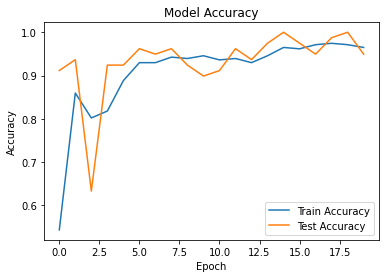

In [ ]:
plt.plot(hist.history['accuracy'], label = 'Train Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Test Accuracy')
plt.title('Model Accuracy') 
plt.legend()
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show()

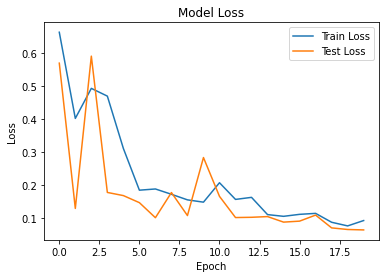

In [ ]:
plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label = 'Test Loss')
plt.title('Model Loss') 
plt.legend()
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.show()

In [ ]:
# MENCETAK DATA CLASS TESTING 
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# MENCETAK DATA PREDISKSI 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# CLASSIFICATION REPORT 
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)
print(classification_report(y_test_n, y_prediction_n, target_names=["COVID-19", "Normal"]))

              precision    recall  f1-score   support

    COVID-19       1.00      0.91      0.95        44
      Normal       0.90      1.00      0.95        35

    accuracy                           0.95        79
   macro avg       0.95      0.95      0.95        79
weighted avg       0.95      0.95      0.95        79



In [ ]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.9493670886075949


array([[40,  4],
       [ 0, 35]])

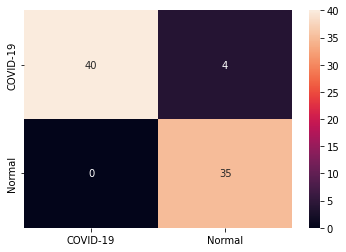

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["COVID-19", "Normal"], yticklabels=["COVID-19", "Normal"])

# Epoch 20 & Learning Rate 0,001

In [ ]:
# COMILE ARSITEKTUR MODEL CNN 
epochs = 20
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# PROSES TRAINING 
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
10/10 [==============================] - 8s 731ms/step - loss: 0.6847 - accuracy: 0.5527 - val_loss: 0.6043 - val_accuracy: 0.9241
Epoch 2/20
10/10 [==============================] - 7s 686ms/step - loss: 0.5754 - accuracy: 0.7316 - val_loss: 0.4928 - val_accuracy: 0.9241
Epoch 3/20
10/10 [==============================] - 7s 691ms/step - loss: 0.4460 - accuracy: 0.8147 - val_loss: 0.3483 - val_accuracy: 0.9114
Epoch 4/20
10/10 [==============================] - 7s 688ms/step - loss: 0.3565 - accuracy: 0.8339 - val_loss: 0.2615 - val_accuracy: 0.8987
Epoch 5/20
10/10 [==============================] - 7s 686ms/step - loss: 0.2805 - accuracy: 0.8786 - val_loss: 0.2417 - val_accuracy: 0.8861
Epoch 6/20
10/10 [==============================] - 7s 683ms/step - loss: 0.3192 - accuracy: 0.8690 - val_loss: 0.2367 - val_accuracy: 0.8861
Epoch 7/20
10/10 [==============================] - 7s 684ms/step - loss: 0.2566 - accuracy: 0.8946 - val_loss: 0.1961 - val_accuracy: 0.9367
Epoch 

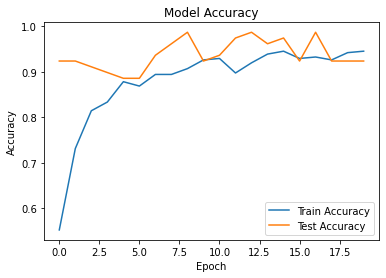

In [ ]:
plt.plot(hist.history['accuracy'], label = 'Train Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Test Accuracy')
plt.title('Model Accuracy') 
plt.legend()
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show()

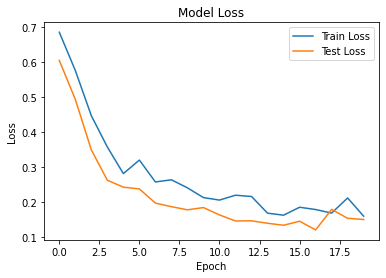

In [ ]:
plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label = 'Test Loss')
plt.title('Model Loss') 
plt.legend()
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.show()

In [ ]:
# MENCETAK DATA CLASS TESTING 
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# MENCETAK DATA PREDISKSI 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
# CLASSIFICATION REPORT
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m) 
print(classification_report(y_test_n, y_prediction_n, target_names=["COVID-19", "Normal"]))

              precision    recall  f1-score   support

    COVID-19       1.00      0.86      0.93        44
      Normal       0.85      1.00      0.92        35

    accuracy                           0.92        79
   macro avg       0.93      0.93      0.92        79
weighted avg       0.94      0.92      0.92        79



In [ ]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.9240506329113924


array([[38,  6],
       [ 0, 35]])

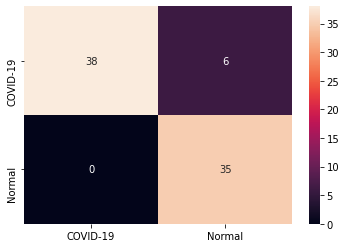

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["COVID-19", "Normal"], yticklabels=["COVID-19", "Normal"])

# Epoch 20 & Learning Rate 0,01

In [ ]:
# COMILE ARSITEKTUR MODEL CNN 
epochs = 20
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# PROSES TRAINING 
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
10/10 [==============================] - 3s 183ms/step - loss: 0.7921 - accuracy: 0.4665 - val_loss: 0.7428 - val_accuracy: 0.2532
Epoch 2/20
10/10 [==============================] - 1s 149ms/step - loss: 0.7386 - accuracy: 0.4665 - val_loss: 0.6832 - val_accuracy: 0.5570
Epoch 3/20
10/10 [==============================] - 1s 148ms/step - loss: 0.6818 - accuracy: 0.5783 - val_loss: 0.6399 - val_accuracy: 0.7722
Epoch 4/20
10/10 [==============================] - 1s 147ms/step - loss: 0.6188 - accuracy: 0.6805 - val_loss: 0.6050 - val_accuracy: 0.7342
Epoch 5/20
10/10 [==============================] - 1s 148ms/step - loss: 0.5923 - accuracy: 0.7093 - val_loss: 0.5544 - val_accuracy: 0.8861
Epoch 6/20
10/10 [==============================] - 1s 146ms/step - loss: 0.5569 - accuracy: 0.7700 - val_loss: 0.5170 - val_accuracy: 0.8734
Epoch 7/20
10/10 [==============================] - 1s 149ms/step - loss: 0.5377 - accuracy: 0.8051 - val_loss: 0.4890 - val_accuracy: 0.8861
Epoch 

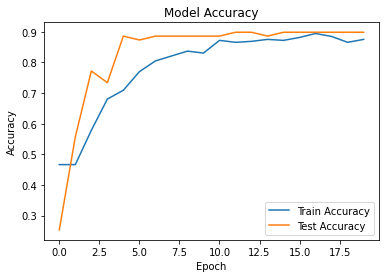

In [ ]:
plt.plot(hist.history['accuracy'], label = 'Train Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Test Accuracy')
plt.title('Model Accuracy') 
plt.legend()
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show()

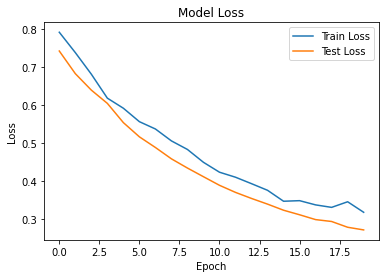

In [ ]:
plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label = 'Test Loss')
plt.title('Model Loss') 
plt.legend()
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.show()

In [ ]:
# MENCETAK DATA CLASS TESTING 
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# MENCETAK DATA PREDISKSI 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# CLASSIFICATION REPORT
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)
print(classification_report(y_test_n, y_prediction_n, target_names=["COVID-19", "Normal"]))

              precision    recall  f1-score   support

    COVID-19       0.89      0.93      0.91        44
      Normal       0.91      0.86      0.88        35

    accuracy                           0.90        79
   macro avg       0.90      0.89      0.90        79
weighted avg       0.90      0.90      0.90        79



In [ ]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.8987341772151899


array([[41,  3],
       [ 5, 30]])

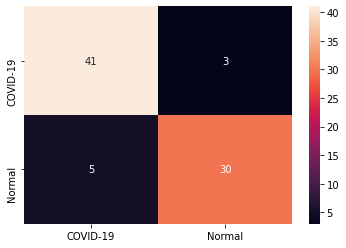

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["COVID-19", "Normal"], yticklabels=["COVID-19", "Normal"])

# Epoch 50 & Learning Rate 0,0001

In [ ]:
# COMILE ARSITEKTUR MODEL CNN  
epochs = 50
lrate = 0.0001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# PROSES TRAINING 
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/50
10/10 [==============================] - 3s 196ms/step - loss: 0.6557 - accuracy: 0.5911 - val_loss: 0.5534 - val_accuracy: 0.7468
Epoch 2/50
10/10 [==============================] - 2s 159ms/step - loss: 0.5212 - accuracy: 0.7668 - val_loss: 0.3845 - val_accuracy: 0.9241
Epoch 3/50
10/10 [==============================] - 2s 158ms/step - loss: 0.3722 - accuracy: 0.8818 - val_loss: 0.2836 - val_accuracy: 0.9114
Epoch 4/50
10/10 [==============================] - 2s 160ms/step - loss: 0.3295 - accuracy: 0.8690 - val_loss: 0.2197 - val_accuracy: 0.9367
Epoch 5/50
10/10 [==============================] - 2s 160ms/step - loss: 0.2655 - accuracy: 0.8882 - val_loss: 0.1846 - val_accuracy: 0.9241
Epoch 6/50
10/10 [==============================] - 2s 161ms/step - loss: 0.2548 - accuracy: 0.9042 - val_loss: 0.2300 - val_accuracy: 0.8861
Epoch 7/50
10/10 [==============================] - 2s 158ms/step - loss: 0.2521 - accuracy: 0.8882 - val_loss: 0.1708 - val_accuracy: 0.9494
Epoch 

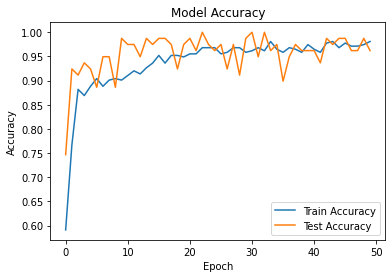

In [ ]:
plt.plot(hist.history['accuracy'], label = 'Train Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Test Accuracy')
plt.title('Model Accuracy') 
plt.legend()
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show()

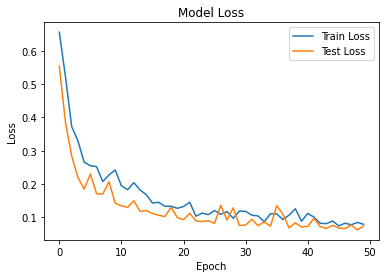

In [ ]:
plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label = 'Test Loss')
plt.title('Model Loss') 
plt.legend()
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.show()

In [ ]:
# MENCETAK DATA CLASS TESTING 
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# MENCETAK DATA PREDISKSI 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# CLASSIFICATION REPORT
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)
print(classification_report(y_test_n, y_prediction_n, target_names=["COVID-19", "Normal"]))

              precision    recall  f1-score   support

    COVID-19       1.00      0.93      0.96        44
      Normal       0.92      1.00      0.96        35

    accuracy                           0.96        79
   macro avg       0.96      0.97      0.96        79
weighted avg       0.97      0.96      0.96        79



In [ ]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.9620253164556962


array([[41,  3],
       [ 0, 35]])

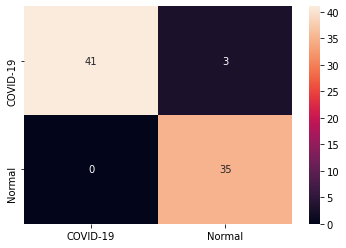

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["COVID-19", "Normal"], yticklabels=["COVID-19", "Normal"])

# Epoch 50 & Learning Rate 0,001

In [ ]:
# COMILE ARSITEKTUR MODEL CNN 
epochs = 50
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# PROSES TRAINING 
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/50
10/10 [==============================] - 7s 568ms/step - loss: 0.7119 - accuracy: 0.4473 - val_loss: 0.6981 - val_accuracy: 0.4430
Epoch 2/50
10/10 [==============================] - 5s 541ms/step - loss: 0.6911 - accuracy: 0.5272 - val_loss: 0.6773 - val_accuracy: 0.8861
Epoch 3/50
10/10 [==============================] - 5s 543ms/step - loss: 0.6639 - accuracy: 0.6645 - val_loss: 0.6614 - val_accuracy: 0.8608
Epoch 4/50
10/10 [==============================] - 5s 549ms/step - loss: 0.6318 - accuracy: 0.7764 - val_loss: 0.6306 - val_accuracy: 0.9114
Epoch 5/50
10/10 [==============================] - 5s 540ms/step - loss: 0.5861 - accuracy: 0.8083 - val_loss: 0.5621 - val_accuracy: 0.9114
Epoch 6/50
10/10 [==============================] - 5s 544ms/step - loss: 0.5043 - accuracy: 0.8722 - val_loss: 0.4380 - val_accuracy: 0.8987
Epoch 7/50
10/10 [==============================] - 5s 540ms/step - loss: 0.3778 - accuracy: 0.8562 - val_loss: 0.2985 - val_accuracy: 0.8987
Epoch 

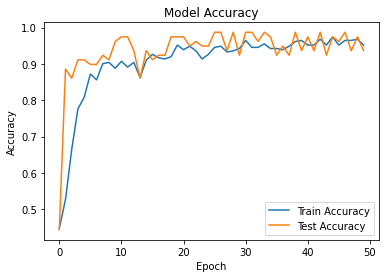

In [ ]:
plt.plot(hist.history['accuracy'], label = 'Train Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Test Accuracy')
plt.title('Model Accuracy') 
plt.legend()
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show()

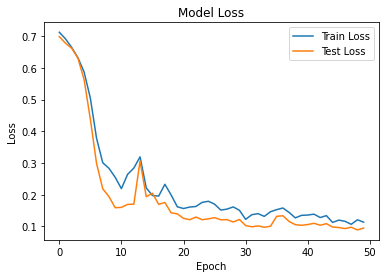

In [ ]:
plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label = 'Test Loss')
plt.title('Model Loss') 
plt.legend()
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.show()

In [ ]:
# MENCETAK DATA CLASS TESTING 
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# MENCETAK DATA PREDISKSI 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
# CLASSIFICATION REPORT
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)
print(classification_report(y_test_n, y_prediction_n, target_names=["COVID-19", "Normal"]))

              precision    recall  f1-score   support

    COVID-19       1.00      0.89      0.94        44
      Normal       0.88      1.00      0.93        35

    accuracy                           0.94        79
   macro avg       0.94      0.94      0.94        79
weighted avg       0.94      0.94      0.94        79



In [ ]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.9367088607594937


array([[39,  5],
       [ 0, 35]])

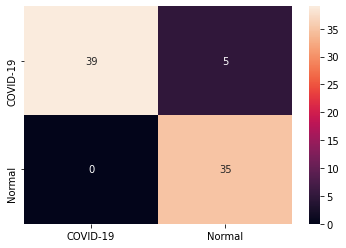

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["COVID-19", "Normal"], yticklabels=["COVID-19", "Normal"])

# Epoch 50 & Learning Rate 0,01

In [ ]:
# COMILE ARSITEKTUR MODEL CNN  
epochs = 50
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# PROSES TRAINING 
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/50
10/10 [==============================] - 7s 593ms/step - loss: 0.7112 - accuracy: 0.4569 - val_loss: 0.7003 - val_accuracy: 0.5316
Epoch 2/50
10/10 [==============================] - 6s 557ms/step - loss: 0.7090 - accuracy: 0.4281 - val_loss: 0.6982 - val_accuracy: 0.5316
Epoch 3/50
10/10 [==============================] - 5s 552ms/step - loss: 0.7069 - accuracy: 0.4345 - val_loss: 0.6961 - val_accuracy: 0.5316
Epoch 4/50
10/10 [==============================] - 6s 555ms/step - loss: 0.7010 - accuracy: 0.4728 - val_loss: 0.6941 - val_accuracy: 0.5823
Epoch 5/50
10/10 [==============================] - 5s 551ms/step - loss: 0.6965 - accuracy: 0.4952 - val_loss: 0.6917 - val_accuracy: 0.5570
Epoch 6/50
10/10 [==============================] - 6s 557ms/step - loss: 0.6932 - accuracy: 0.5208 - val_loss: 0.6893 - val_accuracy: 0.5570
Epoch 7/50
10/10 [==============================] - 5s 551ms/step - loss: 0.6942 - accuracy: 0.4984 - val_loss: 0.6872 - val_accuracy: 0.6076
Epoch 

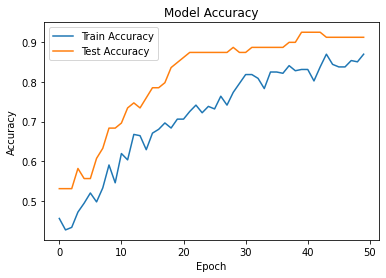

In [ ]:
plt.plot(hist.history['accuracy'], label = 'Train Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Test Accuracy')
plt.title('Model Accuracy') 
plt.legend()
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show()

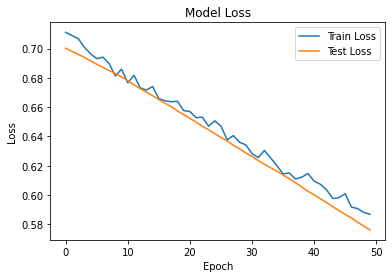

In [ ]:
plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label = 'Test Loss')
plt.title('Model Loss') 
plt.legend()
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.show()

In [ ]:
# MENCETAK DATA CLASS TESTING 
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# MENCETAK DATA PREDISKSI 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# CLASSIFICATION REPORT
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)
print(classification_report(y_test_n, y_prediction_n, target_names=["COVID-19", "Normal"]))

              precision    recall  f1-score   support

    COVID-19       0.95      0.89      0.92        44
      Normal       0.87      0.94      0.90        35

    accuracy                           0.91        79
   macro avg       0.91      0.91      0.91        79
weighted avg       0.91      0.91      0.91        79



In [ ]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.9113924050632911


array([[39,  5],
       [ 2, 33]])

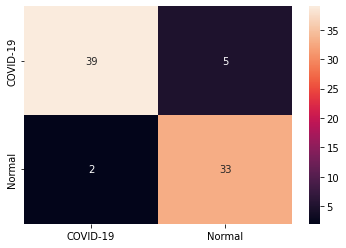

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["COVID-19", "Normal"], yticklabels=["COVID-19", "Normal"])

# Epoch 100 & Learning Rate 0,0001


In [ ]:
# COMILE ARSITEKTUR MODEL CNN 
epochs = 100
lrate = 0.0001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# PROSES TRAINING 
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
10/10 [==============================] - 8s 692ms/step - loss: 0.6781 - accuracy: 0.5879 - val_loss: 0.5707 - val_accuracy: 0.6962
Epoch 2/100
10/10 [==============================] - 7s 667ms/step - loss: 0.4484 - accuracy: 0.7955 - val_loss: 0.3770 - val_accuracy: 0.8228
Epoch 3/100
10/10 [==============================] - 7s 669ms/step - loss: 0.3136 - accuracy: 0.8786 - val_loss: 0.1661 - val_accuracy: 0.9367
Epoch 4/100
10/10 [==============================] - 7s 663ms/step - loss: 0.2534 - accuracy: 0.9169 - val_loss: 0.1726 - val_accuracy: 0.9241
Epoch 5/100
10/10 [==============================] - 7s 659ms/step - loss: 0.2491 - accuracy: 0.9233 - val_loss: 0.1570 - val_accuracy: 0.9367
Epoch 6/100
10/10 [==============================] - 7s 663ms/step - loss: 0.2592 - accuracy: 0.9073 - val_loss: 0.1623 - val_accuracy: 0.9620
Epoch 7/100
10/10 [==============================] - 7s 668ms/step - loss: 0.2058 - accuracy: 0.9329 - val_loss: 0.2007 - val_accuracy: 0.9241

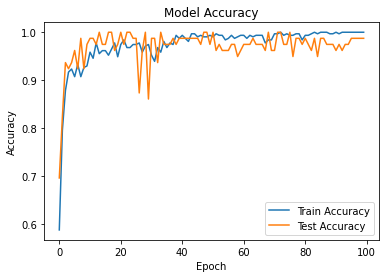

In [ ]:
plt.plot(hist.history['accuracy'], label = 'Train Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Test Accuracy')
plt.title('Model Accuracy') 
plt.legend()
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show()

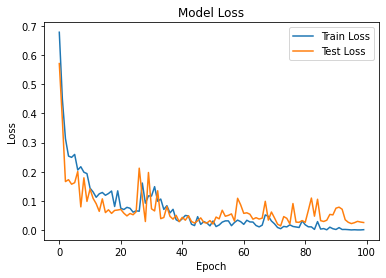

In [ ]:
plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label = 'Test Loss')
plt.title('Model Loss') 
plt.legend()
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.show()

In [ ]:
# MENCETAK DATA CLASS TESTING 
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# MENCETAK DATA PREDISKSI 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# CLASSIFICATION REPORT
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m) 
print(classification_report(y_test_n, y_prediction_n, target_names=["COVID-19", "Normal"]))

              precision    recall  f1-score   support

    COVID-19       1.00      0.98      0.99        44
      Normal       0.97      1.00      0.99        35

    accuracy                           0.99        79
   macro avg       0.99      0.99      0.99        79
weighted avg       0.99      0.99      0.99        79



In [ ]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.9873417721518988


array([[43,  1],
       [ 0, 35]])

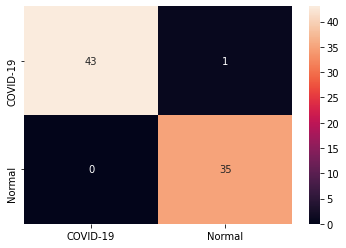

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["COVID-19", "Normal"], yticklabels=["COVID-19", "Normal"])

# Epoch 100 & Learning Rate 0,001

In [ ]:
# COMILE ARSITEKTUR MODEL CNN 
epochs = 100
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# PROSES TRAINING 
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
10/10 [==============================] - 6s 509ms/step - loss: 0.6936 - accuracy: 0.5112 - val_loss: 0.6795 - val_accuracy: 0.4430
Epoch 2/100
10/10 [==============================] - 5s 479ms/step - loss: 0.6259 - accuracy: 0.6454 - val_loss: 0.5726 - val_accuracy: 0.8228
Epoch 3/100
10/10 [==============================] - 5s 478ms/step - loss: 0.5164 - accuracy: 0.8115 - val_loss: 0.4538 - val_accuracy: 0.9241
Epoch 4/100
10/10 [==============================] - 5s 468ms/step - loss: 0.3810 - accuracy: 0.8403 - val_loss: 0.3017 - val_accuracy: 0.8987
Epoch 5/100
10/10 [==============================] - 5s 474ms/step - loss: 0.3037 - accuracy: 0.8690 - val_loss: 0.2116 - val_accuracy: 0.9367
Epoch 6/100
10/10 [==============================] - 5s 472ms/step - loss: 0.3102 - accuracy: 0.8818 - val_loss: 0.2231 - val_accuracy: 0.9114
Epoch 7/100
10/10 [==============================] - 5s 474ms/step - loss: 0.2481 - accuracy: 0.8914 - val_loss: 0.2368 - val_accuracy: 0.8987

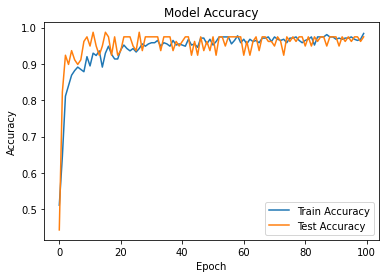

In [ ]:
plt.plot(hist.history['accuracy'], label = 'Train Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Test Accuracy')
plt.title('Model Accuracy') 
plt.legend()
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show()

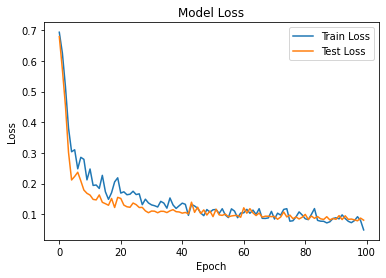

In [ ]:
plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label = 'Test Loss')
plt.title('Model Loss') 
plt.legend()
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.show()

In [ ]:
# MENCETAK DATA CLASS TESTING 
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# MENCETAK DATA PREDISKSI 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# CLASSIFICATION REPORT
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)
print(classification_report(y_test_n, y_prediction_n, target_names=["COVID-19", "Normal"]))

              precision    recall  f1-score   support

    COVID-19       1.00      0.95      0.98        44
      Normal       0.95      1.00      0.97        35

    accuracy                           0.97        79
   macro avg       0.97      0.98      0.97        79
weighted avg       0.98      0.97      0.97        79



In [ ]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.9746835443037974


array([[42,  2],
       [ 0, 35]])

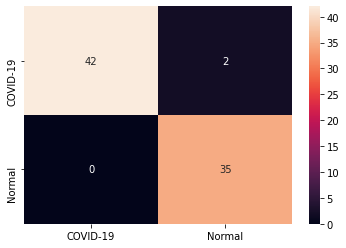

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["COVID-19", "Normal"], yticklabels=["COVID-19", "Normal"])

# Epoch 100 & Learning Rate 0,01

In [ ]:
# COMILE ARSITEKTUR MODEL CNN 
epochs = 100
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# PROSES TRAINING 
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
10/10 [==============================] - 8s 682ms/step - loss: 0.6985 - accuracy: 0.4952 - val_loss: 0.6876 - val_accuracy: 0.4430
Epoch 2/100
10/10 [==============================] - 7s 655ms/step - loss: 0.6528 - accuracy: 0.6262 - val_loss: 0.6503 - val_accuracy: 0.7215
Epoch 3/100
10/10 [==============================] - 7s 655ms/step - loss: 0.5994 - accuracy: 0.8019 - val_loss: 0.5953 - val_accuracy: 0.9367
Epoch 4/100
10/10 [==============================] - 7s 652ms/step - loss: 0.5314 - accuracy: 0.8083 - val_loss: 0.5182 - val_accuracy: 0.8987
Epoch 5/100
10/10 [==============================] - 7s 653ms/step - loss: 0.4136 - accuracy: 0.9073 - val_loss: 0.3843 - val_accuracy: 0.9367
Epoch 6/100
10/10 [==============================] - 7s 656ms/step - loss: 0.3222 - accuracy: 0.8946 - val_loss: 0.2739 - val_accuracy: 0.9367
Epoch 7/100
10/10 [==============================] - 7s 656ms/step - loss: 0.2561 - accuracy: 0.8946 - val_loss: 0.2083 - val_accuracy: 0.9494

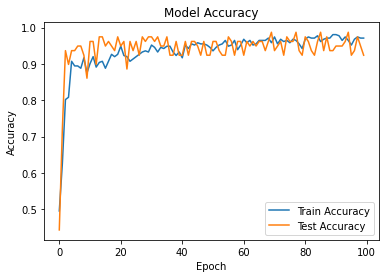

In [ ]:
plt.plot(hist.history['accuracy'], label = 'Train Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Test Accuracy')
plt.title('Model Accuracy') 
plt.legend()
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show()

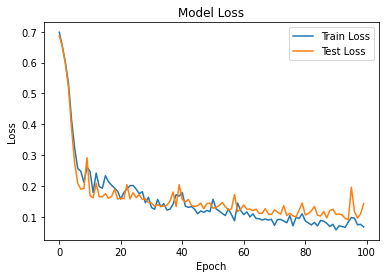

In [ ]:
plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label = 'Test Loss')
plt.title('Model Loss') 
plt.legend()
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.show()

In [ ]:
# MENCETAK DATA CLASS TESTING 
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# MENCETAK DATA PREDISKSI 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
# CLASSIFICATION REPORT
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)
print(classification_report(y_test_n, y_prediction_n, target_names=["COVID-19", "Normal"]))

              precision    recall  f1-score   support

    COVID-19       1.00      0.86      0.93        44
      Normal       0.85      1.00      0.92        35

    accuracy                           0.92        79
   macro avg       0.93      0.93      0.92        79
weighted avg       0.94      0.92      0.92        79



In [ ]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.9240506329113924


array([[38,  6],
       [ 0, 35]])

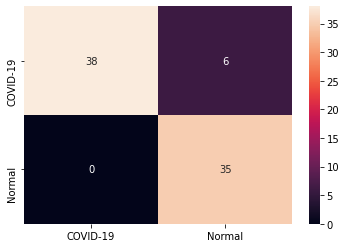

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["COVID-19", "Normal"], yticklabels=["COVID-19", "Normal"])